### Momentum in gradient decent 

In this example, through the use of a function $f$ which has two dictinct areas of convexity and concavity, we will show the use of momentum. Keep in mind this is a highly engineered example. Here we will show that without some form of momentum and when our optimal peramters meets a zero gradient area there is no continuation on learning, however, with momentum, the decent does lead to the global optimum   

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### 1. Mahalanobis Distance Function

The Mahalanobis distance is calculated using the formula:
$$
M\_distance(x, c, S) = \sqrt{(x - c)^T S^{-1} (x - c)}
$$

Where:
- $x$ is the vector of interest,
- $c$ is the center (mean),
- $S$ is the covariance matrix, and

### 2. Function $p(u)$

The function $p(u)$ is defined as:

$$
p(u) = \begin{cases} 
0 & \text{if } u^2 > 1 \\
(1 - u^2)^2 & \text{if } u^2 \leq 1
\end{cases}
$$
### 3. Function $f(x, c, w, s)$

The function $f(x, c, w, s)$ is defined as a weighted sum of $p(M\_distance(c[i], x, s[i]))$:

$$
f(x, c, w, s) = \sum_{i=1}^{n} w_i \cdot p(M\_distance(c_i, x, S_i))
$$

Where:
- $x$ is a vector,
- $c_i$ is the center for each component $i$,
- $w_i$ is the weight associated with each component $i$,
- $S_i$ is the covariance matrix for each component $i$,

### 4. Gradient of $f(x, c, w, s)$

The gradient of the function $f(x, c, w, s)$ is computed by differentiating each term in the summation:

$$
\frac{\partial f}{\partial x} = \sum_{i=1}^{n} -4w_i \cdot (1 - d_i^2) \cdot \nabla_x M\_distance(c_i, x, S_i)
$$

Where:
- $d_i^2$ is the squared Mahalanobis distance ($M\_distance$) for component $i$,
- $\nabla_x M\_distance$ is the gradient of the Mahalanobis distance with respect to $x$.

For the gradient computation:
- If the Mahalanobis distance is used ($S_i$), the gradient is computed with respect to the covariance matrix:
  $$
  \nabla_x M\_distance = S_i^{-1} \cdot (x - c_i)
  $$
- If Euclidean distance is used, the gradient is simply:
  $$
  \nabla_x M\_distance = x - c_i
  $$


In [2]:
def M_distance(x,c,S):
    xc = x - c
    SI = np.linalg.inv(S)
    return np.sqrt(np.dot(np.dot(xc.T,SI),xc))

def p(u):
    if np.dot(u,u) > 1:
        return 0
    return np.power((1-np.power(u,2)),2)

def f(x, c, w, s):
    output = 0
    for i in range(x.shape[0]):
        output += w[i] * p(M_distance(c[i],x,s[i]))
    return output


def grad_f(x, c, w, s):
    grad = np.zeros(x.shape)

    # Iterate over the components
    for i in range(x.shape[0]):
        xc = x - c[i]
        S_inv = np.linalg.inv(s[i])
        
        # Compute Mahalanobis distance squared
        dist_sq = np.dot(xc.T, np.dot(S_inv, xc)) if i == 1 else np.dot(xc.T, xc)
        
        # Check the condition and compute gradient contribution
        if dist_sq < 1:
            factor = -4 * w[i] * (1 - dist_sq)
            if i == 1:  # Using Mahalanobis distance
                grad += factor * np.dot(S_inv, xc)
            else:  # Using Euclidean distance
                grad += factor * xc

    return grad


We have two points at $(-1,1, 1,1)$ and $(0.8, -0.8)$, these will act as the concave and convex areas respectivly. The skew of the concave area is given by $S2$.


As seen bellow.

In [3]:
c1 = np.array([-1.1, 1.1]).transpose()
c2 = np.array([0.8, -0.8]).transpose()

S1 = np.identity(2)
S2 = np.array([[1.1,-0.9],[-0.9,1.1]])

S = [S1, S2]
w = [1,-1]
c = [c1, c2]

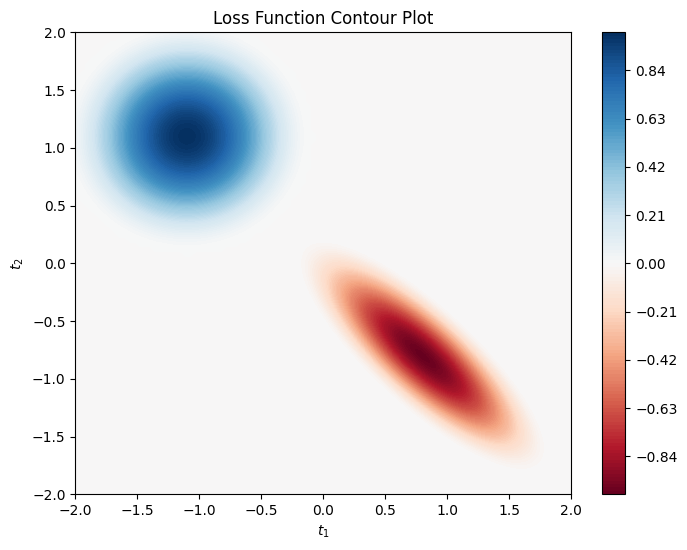

In [4]:
t1_vals = np.linspace(-2,2,100)
t2_vals = np.linspace(-2,2,100)
t1, t2 = np.meshgrid(t1_vals, t2_vals)

value = np.zeros_like(t1)

for i in range(t1.shape[0]):
    for j in range(t1.shape[1]):
        t = np.array([t1[i, j], t2[i, j]])
        value[i, j] = f(t,c,w,S)

plt.figure(figsize=(8, 6))
cp = plt.contourf(t1, t2, value, levels=150, cmap='RdBu')
plt.colorbar(cp)
plt.title("Loss Function Contour Plot")
plt.xlabel("$t_1$")

plt.ylabel("$t_2$")
plt.show()

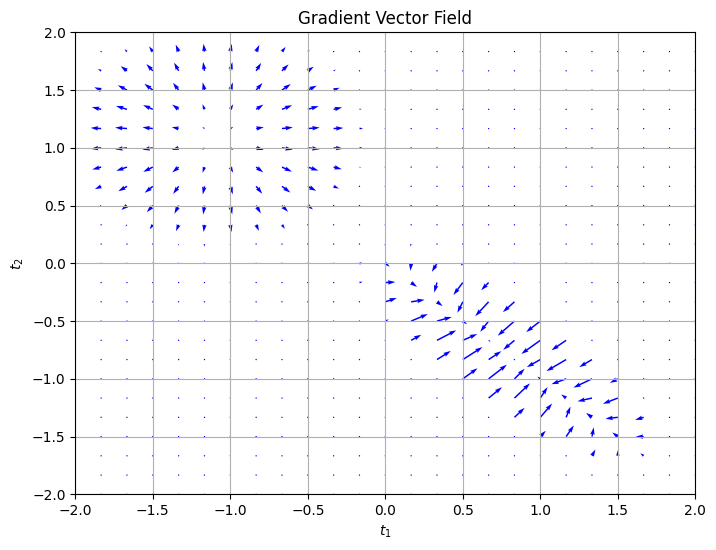

In [ ]:
# Grid points for plotting
t1_vals = np.linspace(-2, 2, 25)
t2_vals = np.linspace(-2, 2, 25)
t1, t2 = np.meshgrid(t1_vals, t2_vals)

# Compute the gradient at each grid point
grad_t1 = np.zeros_like(t1)
grad_t2 = np.zeros_like(t2)

for i in range(t1.shape[0]):
    for j in range(t1.shape[1]):
        t = np.array([t1[i, j], t2[i, j]])
        grad = grad_f(t, c, w, S)
        grad_t1[i, j] = grad[0]
        grad_t2[i, j] = grad[1]

# Plot the vector field
plt.figure(figsize=(8, 6))
plt.quiver(t1, t2, -grad_t1*0.05, -grad_t2*0.05, color='blue', angles='xy', scale_units='xy', scale=1)
plt.title("Gradient Vector Field")
plt.xlabel("$t_1$")
plt.ylabel("$t_2$")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid()
plt.show()

# Training
Gradient Decent

In [6]:
# Theta
# x = np.array([-0.45, 0.5]).transpose()
x = np.array([-0.65, 0.7]).transpose()


# Rates
a = 0.15

# History 
losses = []
x_h = []

In [7]:
for i in range(10):
    losses.append(f(x,c,w,S))
    x_h.append(x.copy())
    x -= a*grad_f(x, c, w, S)

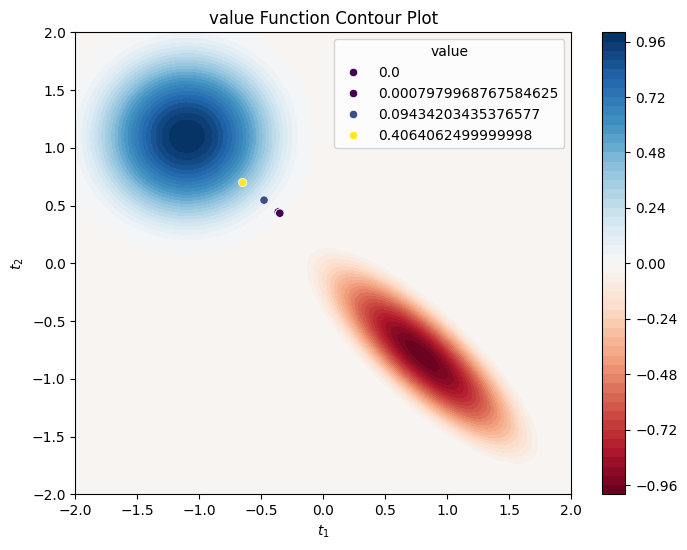

In [8]:


t1_vals = np.linspace(-2,2,100)
t2_vals = np.linspace(-2,2,100)
t1, t2 = np.meshgrid(t1_vals, t2_vals)

x_h = np.array(x_h)

plt.figure(figsize=(8, 6))
cp = plt.contourf(t1, t2, value, levels=50, cmap='RdBu')
plt.colorbar(cp)
plt.title("value Function Contour Plot")
plt.xlabel("$t_1$")

plt.ylabel("$t_2$")


sns.scatterplot(x='X1', y='X2', hue='value',
                palette='viridis', data=pd.DataFrame({'X1': x_h[:, 0], 'X2': x_h[:, 1], 'value': losses}), marker='o')

plt.show()


with momentum

In [9]:
# Theta
# x = np.array([-0.45, 0.5]).transpose()
x = np.array([-0.65, 0.7]).transpose()

# Rates
a = 0.15
b = 0.5

# Momentum
# mom = np.array([0.4, -0.4]).transpose()
mom = np.zeros(2)

# History 
losses = []
x_h = []

In [10]:
for i in range(40):
    # History
    losses.append(f(x,c,w,S))
    x_h.append(x.copy())

    # momentum
    mom = b * mom  - a*grad_f(x, c, w, S)
    x += mom

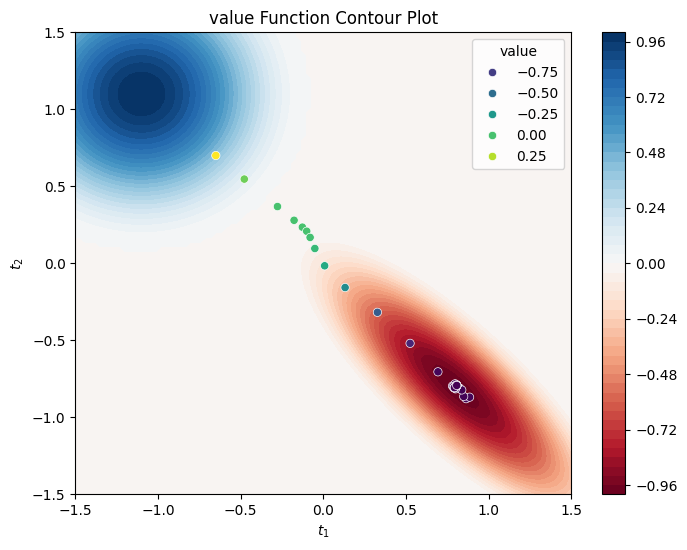

In [11]:

size = 1.5
t1_vals = np.linspace(-size, size ,100)
t2_vals = np.linspace(-size, size ,100)
t1, t2 = np.meshgrid(t1_vals, t2_vals)

value = np.zeros_like(t1)

for i in range(t1.shape[0]):
    for j in range(t1.shape[1]):
        t = np.array([t1[i, j], t2[i, j]])
        value[i, j] = f(t,c,w,S)

x_h = np.array(x_h)

plt.figure(figsize=(8, 6))
cp = plt.contourf(t1, t2, value, levels=50, cmap='RdBu')
plt.colorbar(cp)
plt.title("value Function Contour Plot")
plt.xlabel("$t_1$")

plt.ylabel("$t_2$")


sns.scatterplot(x='X1', y='X2', hue='value',
                palette='viridis', data=pd.DataFrame({'X1': x_h[:, 0], 'X2': x_h[:, 1], 'value': losses}), marker='o')

plt.show()
